In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', None) # 모든 행 출력
pd.set_option('display.max_rows', 10) # 10개 행 출력


# 데이터 불러오기
df = pd.read_csv("../Disney_dataset/titles.csv")
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,"['reality', 'documentation', 'action']",['US'],1.0,tt15257974,7.8,23.0,3.733,2.000
1850,tm1308301,Disney100 | Special Look,MOVIE,"In 2023, Disney’s 100-year milestone provides ...",2023,NaN,1,[],[],NaN,NaN,NaN,NaN,1.960,NaN
1851,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN
1852,tm1227149,Baby Sharks,MOVIE,"Even the biggest, fastest and fiercest predato...",2023,PG,45,['documentation'],['US'],NaN,tt21271008,6.3,19.0,1.501,2.000


In [2]:
# 데이터셋 구조 파악
print("데이터셋 크기:", df.shape)
print("열(변수)의 개수:", len(df.columns))
print("열의 이름:", df.columns)

데이터셋 크기: (1854, 15)
열(변수)의 개수: 15
열의 이름: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [3]:
# 데이터셋 살펴보기 (상위 5개 데이터 출력)
print("\n상위 5개 데이터:")
print(df.head())


상위 5개 데이터:
        id                                   title   type  \
0  tm89464                  Miracle on 34th Street  MOVIE   
1  tm61729  The Adventures of Ichabod and Mr. Toad  MOVIE   
2  tm61052                              Cinderella  MOVIE   
3  tm87946                                   Dumbo  MOVIE   
4  tm74391                                Fantasia  MOVIE   

                                         description  release_year  \
0  Kris Kringle, seemingly the embodiment of Sant...          1947   
1  The Wind in the Willows: Concise version of Ke...          1950   
2  Cinderella has faith her dreams of a better li...          1950   
3  Dumbo is a baby elephant born with over-sized ...          1941   
4  Walt Disney's timeless masterpiece is an extra...          1941   

  age_certification  runtime  \
0                 G       96   
1                 G       68   
2                 G       74   
3                 G       64   
4                 G      119   

       

In [4]:
# 기본적인 통계 분석
print("\n수치형 열의 기술 통계량:")
print(df.describe())


수치형 열의 기술 통계량:
       release_year      runtime     seasons   imdb_score    imdb_votes  \
count   1854.000000  1854.000000  540.000000  1339.000000  1.328000e+03   
mean    2006.193635    59.206580    2.618519     6.620687  6.961624e+04   
std       20.629561    38.566305    3.268281     1.066208  1.846213e+05   
min     1928.000000     1.000000    1.000000     1.600000  5.000000e+00   
25%     2002.000000    24.000000    1.000000     5.950000  3.267500e+02   
50%     2014.000000    48.000000    2.000000     6.700000  3.228000e+03   
75%     2020.000000    91.000000    3.000000     7.400000  3.273050e+04   
max     2023.000000   182.000000   36.000000     9.500000  1.403757e+06   

       tmdb_popularity   tmdb_score  
count      1839.000000  1708.000000  
mean         25.745671     6.817494  
std          79.389568     1.165990  
min           0.600000     2.000000  
25%           2.998500     6.217500  
50%           9.148000     6.873000  
75%          23.152500     7.500000  
max 

In [5]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())


결측치 개수:
id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
dtype: int64


In [6]:
# 범주형 열의 고유값 개수
print("\n범주형 열의 고유값 개수:")
for column in df.select_dtypes(include='object'):
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


범주형 열의 고유값 개수:
id: 1854 unique values
title: 1814 unique values
type: 2 unique values
description: 1844 unique values
age_certification: 11 unique values
genres: 718 unique values
production_countries: 85 unique values
imdb_id: 1376 unique values


In [7]:
# 열간 상관관계
print("\n열간 상관관계:")
print(df.corr())


열간 상관관계:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000  0.016650 -0.316920    0.020105   -0.039026   
runtime              0.016650  1.000000  0.091813   -0.056332    0.425677   
seasons             -0.316920  0.091813  1.000000    0.054492    0.164229   
imdb_score           0.020105 -0.056332  0.054492    1.000000    0.263574   
imdb_votes          -0.039026  0.425677  0.164229    0.263574    1.000000   
tmdb_popularity      0.072248  0.143759  0.182105    0.098388    0.308815   
tmdb_score           0.068751 -0.100243  0.023725    0.480065    0.139903   

                 tmdb_popularity  tmdb_score  
release_year            0.072248    0.068751  
runtime                 0.143759   -0.100243  
seasons                 0.182105    0.023725  
imdb_score              0.098388    0.480065  
imdb_votes              0.308815    0.139903  
tmdb_popularity         1.000000    0.100453  
tmdb_score              0.100453    1.000000

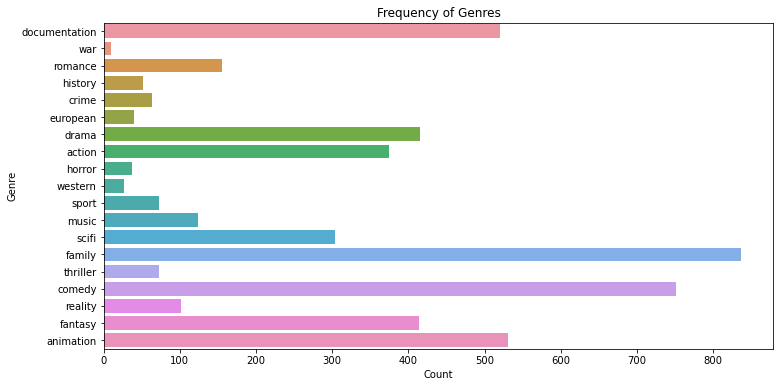

In [8]:
import re

# genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(re.findall(r'[a-zA-Z]+', genre_list))

# 각 문자열의 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in re.findall(r'[a-zA-Z]+', genre_list):
            genre = genre.lower()
            genre_counts[genre] += 1

# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

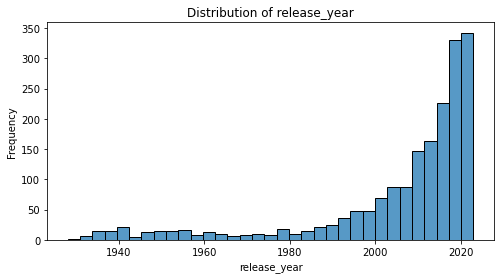

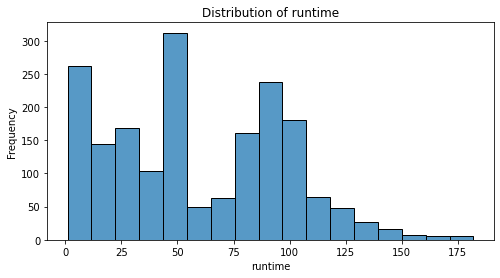

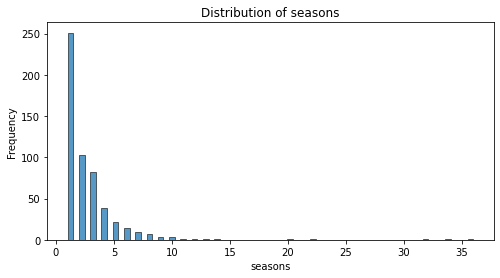

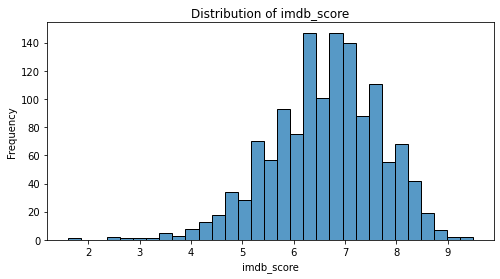

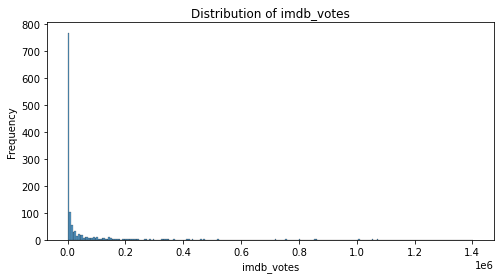

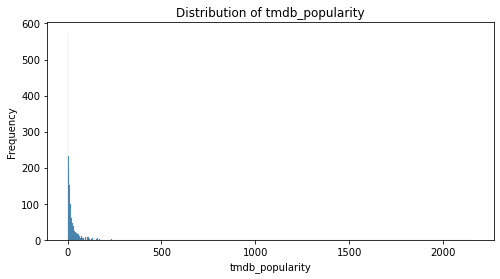

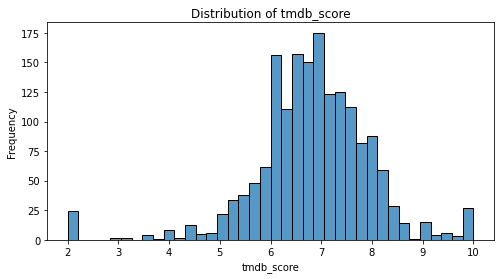

In [9]:
# 수치형 열의 분포 시각화
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna())
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [2]:
# 범주형 열의 빈도수 시각화 (id, title, description 열 제외)
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns = [column for column in categorical_columns if column not in ['id', 'title', 'description', 'genres']]

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'df' is not defined

In [40]:
df['age_certification'].unique()

array(['G', nan, 'PG', 'TV-G', 'TV-PG', 'TV-MA', 'PG-13', 'TV-Y7',
       'TV-Y7-FV', 'TV-Y', 'TV-14', 'R'], dtype=object)

In [42]:
print(len(df[df['type']=="MOVIE"]))
print(len(df[df['type']=="SHOW"]))

1314
540


In [38]:
# 각 타입 별 연령제한 데이터 확인

movies = ['G', 'PG', 'PG-13', 'R']
shows = ['TV-G', 'TV-PG', 'TV-MA', 'TV-Y7', 'TV-Y7-FV', 'TV-Y', 'TV-14',]

movie_num = 0
show_num = 0

for i in movies:
    movie_num += len(df[df['age_certification'] == i])

for i in shows:
    show_num += len(df[df['age_certification'] == i])
    
nan_num = len(df[df['age_certification'].isnull()])
    
print("movie_num: ", movie_num)
print("show_num: ", show_num)
print("nan_num: ", nan_num)

print("total_num: ", movie_num + show_num + nan_num)

movie_num:  958
show_num:  445
nan_num:  451
total_num:  1854


### movie를 나타내는 연령제한 명칭은 다음과 같다.
- G
- PG
- PG-13
- R
    
### show를 나타내는 연령제한 명칭은 다음과 같다.
- TV-G
- TV-PG
- TV-MA
- TV-Y7
- TV-Y7-FV
- TV-Y
- TV-14

- 그렇다면, 연령제한 속성이 비어있는 영상의 연령제한을 추정하는 모델을 만들 수 있을까?
- 혹시 연령제한이 정해지지 않은 또다른 이유가 있는 것은 아닐까?
- 연령제한이 비어있는 영상의 공통점은 무엇일까?
- 연령제한이 있는 영상과 없는 영상의 차이점은 무엇일까?

In [39]:
# len(df[df['age_certification'] == "G"])

In [8]:
# pd.set_option('display.max_rows', None) ## 모든 행 출력
pd.set_option('display.max_rows', 10) ## 모든 행 출력
df[df['age_certification'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
7,tm165060,The Tortoise and the Hare,MOVIE,The Tortoise and the Hare is an animated short...,1935,NaN,9,"['animation', 'documentation']",['US'],NaN,NaN,NaN,NaN,9.286,6.686
9,tm67239,Lonesome Ghosts,MOVIE,"On a dark and stormy night, four bored ghosts ...",1937,NaN,9,['comedy'],['US'],NaN,NaN,NaN,NaN,5.929,6.733
10,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,NaN,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8772.0,8.872,6.500
12,tm87968,Early to Bed,MOVIE,"Donald has to get up early, but everything see...",1941,NaN,8,['animation'],['US'],NaN,NaN,NaN,NaN,4.764,6.713
15,tm77407,Saludos Amigos,MOVIE,Live-action segments show members of the Disne...,1943,NaN,41,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0036326,6.1,6506.0,17.765,5.876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,ts313654,The Low Tone Club,SHOW,Amaranto Molina is a peculiar professor. With ...,2023,NaN,32,"['comedy', 'drama', 'music']",['CO'],1.0,tt15559540,8.3,76.0,24.965,10.000
1837,tm1298257,Schoolhouse Rock! 50th Anniversary Singalong,MOVIE,Dust off your dictionaries and grab that hairb...,2023,NaN,40,"['comedy', 'family', 'history', 'music']",['US'],NaN,tt26231144,4.5,70.0,3.767,2.000
1844,ts300548,@Gina Yei: #WithAllMyHeartAndMore,SHOW,Yei!— Is what Gina says in positive situations...,2023,NaN,43,"['drama', 'comedy']",['PR'],1.0,tt15539452,8.3,84.0,40.633,7.000
1846,ts378918,Voices Rising: The Music of Wakanda Forever,SHOW,A new documentary series focusing on the music...,2023,NaN,31,"['documentation', 'music']",['US'],1.0,tt26345409,7.2,30.0,10.123,NaN


-> 연령제한이 없는 영상들의 장르를 보아하니, 아마 전체연령일 가능성이 높을 것 같다.